In [27]:
import pandas as pd

# Load the dataset
file_path = "F:/Inttrvu/group project/data.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10901 non-null  float64
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10845 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10860 non-null  float64
 11  Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.0+ MB


(None,
    ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
 0   1               D           Flight                    4                2   
 1   2               F           Flight                    4                5   
 2   3               A           Flight                    2                2   
 3   4               B           Flight                    3                3   
 4   5               C           Flight                    2                2   
 
    Cost_of_the_Product  Prior_purchases Product_importance Gender  \
 0                177.0                3                low      F   
 1                216.0                2                low      M   
 2                183.0                4                low      M   
 3                176.0                4             medium      M   
 4                184.0                3             medium      F   
 
    Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
 0                44    

In [ ]:
Dataset Summary:
    Total Rows: 10,999
    Total Columns: 12
    Target Variable: Reached.on.Time_Y.N (1: Late, 0: On Time)

Missing Values:

    Cost_of_the_Product (98 missing)
    Product_importance (154 missing)
    Weight_in_gms (139 missing)

Feature Types:

Numerical: 
    Customer_care_calls
    Customer_rating
    Cost_of_the_Product
    Prior_purchases
    Discount_offered 
    Weight_in_gms

Categorical: 

    Warehouse_block
    Mode_of_Shipment
    Product_importance
    Gender

In [ ]:
Let's handle the missing values using appropriate strategies:

Cost_of_the_Product (98 missing values, numeric)

Use median imputation since it's a continuous variable and might have outliers.
Weight_in_gms (139 missing values, numeric)

Use median imputation for the same reason as above.
Product_importance (154 missing values, categorical)

Use mode (most frequent value) imputation since it’s categorical.

In [29]:
df.fillna({
    "Cost_of_the_Product": df["Cost_of_the_Product"].median(),
    "Weight_in_gms": df["Weight_in_gms"].median(),
    "Product_importance": df["Product_importance"].mode()[0]
}, inplace=True)

# Verify if missing values are handled
df.isnull().sum()


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
For encoding categorical variables, we'll use the following strategies:

label encoding and OHE are available for Encoding, now we use OHE 

One-Hot Encoding for nominal categorical variables:

    Warehouse_block
    Mode_of_Shipment
    Product_importance
    Gender

Avoiding Dummy Variable Trap:

We’ll drop one category from each one-hot encoded feature to prevent redundancy.


In [31]:
# One-Hot Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"], drop_first=True)

# Display the first few rows after encoding
df_encoded.head()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,2,177.0,3,44,1233.0,1,False,False,True,False,False,False,True,False,False
1,2,4,5,216.0,2,59,3088.0,1,False,False,False,True,False,False,True,False,True
2,3,2,2,183.0,4,48,3374.0,1,False,False,False,False,False,False,True,False,True
3,4,3,3,176.0,4,10,1177.0,1,True,False,False,False,False,False,False,True,True
4,5,2,2,184.0,3,46,2484.0,1,False,True,False,False,False,False,False,True,False


In [ ]:

Feature Selection – Drop the ID column (as it is not useful for predictions).
Train-Test Split – Separate the data into training and testing sets.


In [33]:
from sklearn.model_selection import train_test_split

# Drop the 'ID' column as it is not a useful feature
df_encoded.drop(columns=["ID"], inplace=True)

# Define features and target variable
X = df_encoded.drop(columns=["Reached.on.Time_Y.N"])  # Features
y = df_encoded["Reached.on.Time_Y.N"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8799, 15), (2200, 15), (8799,), (2200,))

In [ ]:

The dataset has been successfully split:

Training Set: 8,799 samples, 15 features
Testing Set: 2,200 samples, 15 features


In [ ]:
Logistic Regression, Random Forest, and XGBoost are all Supervised Machine Learning models, 
specifically used for classification and regression tasks

Initially, we trained the model with Random forest.


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.6482
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.69      0.61       887
           1       0.75      0.62      0.68      1313

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.67      0.65      0.65      2200



In [ ]:
Initial Model Performance

    Accuracy: 64.82%

Class-wise Performance:

Class 0 (On-Time Shipments

Precision: 0.55 (Many false positives)
             
Recall: 0.69 (Catching most on-time shipments)
             
Class 1 (Late Shipments)
Precision: 0.75 (Fewer false positives)
Recall: 0.62 (Missing some late shipments)
             
Observations:
            
    The model performs better at predicting late shipments (class 1) than on-time shipments.
    The recall for class 1 (62%) means some delayed shipments are being missed.
    The precision for class 0 (55%) indicates some misclassification of on-time shipments.

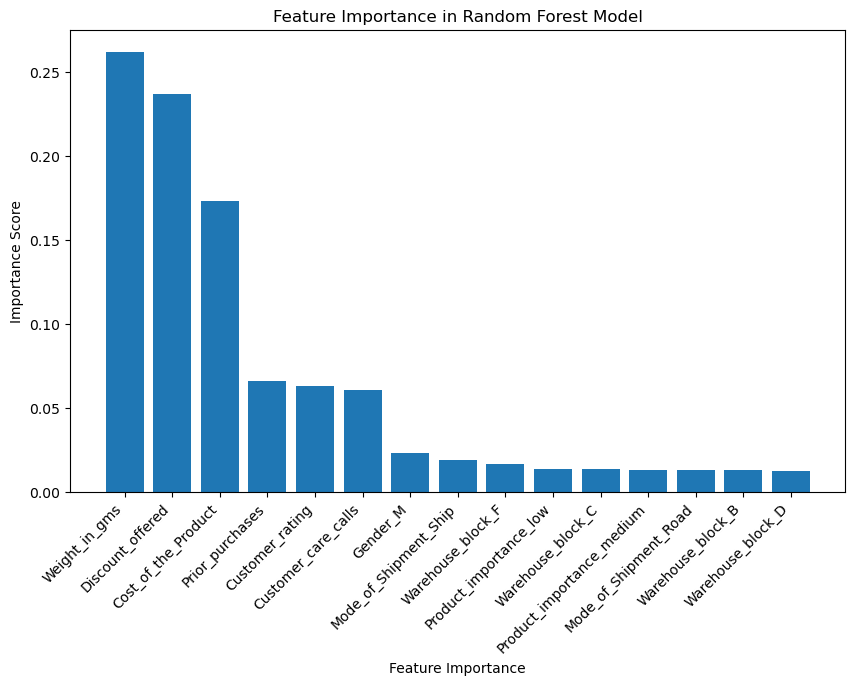

[('Weight_in_gms', 0.2621973202082489),
 ('Discount_offered', 0.23693842847312052),
 ('Cost_of_the_Product', 0.17329674187442737),
 ('Prior_purchases', 0.06602195150932313),
 ('Customer_rating', 0.06327577458246134),
 ('Customer_care_calls', 0.060544610038121914),
 ('Gender_M', 0.023090629794345542),
 ('Mode_of_Shipment_Ship', 0.01867096743347951),
 ('Warehouse_block_F', 0.016667693730327532),
 ('Product_importance_low', 0.013641259596431296),
 ('Warehouse_block_C', 0.013337067635405207),
 ('Product_importance_medium', 0.01328917464152795),
 ('Mode_of_Shipment_Road', 0.01327529501010049),
 ('Warehouse_block_B', 0.013080949861173773),
 ('Warehouse_block_D', 0.012672135611505677)]

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest Model")
plt.show()

# Display the sorted feature importances
list(zip(feature_names[sorted_indices], feature_importances[sorted_indices]))

In [ ]:
Hyperparameter Tuning for Random Forest using Grid Search CV

optimize key parameters like:

    n_estimators (number of trees)
    max_depth (tree depth)
    min_samples_split (minimum samples to split a node)
    min_samples_leaf (minimum samples in a leaf node)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the best model
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Predict on test set
y_pred_tuned = best_model.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

print(f"Tuned Accuracy: {accuracy_tuned:.4f}")
print("Tuned Classification Report:\n", report_tuned)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Accuracy: 0.6745
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.89      0.69       887
           1       0.87      0.53      0.66      1313

    accuracy                           0.67      2200
   macro avg       0.72      0.71      0.67      2200
weighted avg       0.75      0.67      0.67      2200



In [ ]:
Tuned Model Performance:

    Accuracy: 67.45% (Improved from 64.82%)

Precision & Recall Tradeoff:

Class 0 (On-Time Shipments)

    Recall ↑ (89%): Model captures most on-time shipments.
    Precision ↓ (56%): Some misclassification of late shipments as on-time.

Class 1 (Late Shipments)

    Precision ↑ (87%): Fewer false positives.
    Recall ↓ (53%): Model is missing some late shipments.
    
Observations & Next Steps
    
Better Overall Performance – Model is improving, but it's biased toward on-time shipments (high recall for class 0).
Imbalanced Recall – Since recall for class 1 (late shipments) is low (53%), we are missing actual delays.


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define parameter grid with a wider range
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search with 10 iterations
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)

random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the best model
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Predict on test set
y_pred_tuned = best_model.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

print(f"Tuned Accuracy: {accuracy_tuned:.4f}")
print("Tuned Classification Report:\n", report_tuned)


Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Tuned Accuracy: 0.6723
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.87      0.68       887
           1       0.86      0.54      0.66      1313

    accuracy                           0.67      2200
   macro avg       0.71      0.70      0.67      2200
weighted avg       0.74      0.67      0.67      2200



In [ ]:
Comparison: Grid Search vs. Randomized Search CV

Both tuning methods resulted in similar accuracy (~67%), but the parameters differ slightly.

Method	      Best n_estimators	Best max_depth	Best min_samples_split	Best min_samples_leaf	Accuracy
Grid Search	         100	10	2	2	67.45%
Randomized Search	  50	10	5	2	67.23%

Observations:
            
Both models favor class 0 (on-time shipments) with high recall (~87%).
Class 1 (late shipments) recall is still low (~54%), meaning the model is missing some late deliveries.
Accuracy improved slightly from the original 64.82%

In [ ]:
Handling Class Imbalance has 2 way

    Class Weights
    SMOTE 

applying SMOTE

In [ ]:
Handling Class Imbalance with Applying SMOTE (Synthetic Minority Oversampling Technique)

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Random Forest model with the best parameters
smote_model = RandomForestClassifier(
    n_estimators=50, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    random_state=42
)
smote_model.fit(X_train_smote, y_train_smote)

# Predictions on the test set
y_pred_smote = smote_model.predict(X_test)

# Evaluate performance
accuracy_smote = accuracy_score(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote)

print(f"SMOTE Model Accuracy: {accuracy_smote:.4f}")
print("SMOTE Model Classification Report:\n", report_smote)


C:\Users\Sri\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


SMOTE Model Accuracy: 0.6727
SMOTE Model Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.94      0.70       887
           1       0.92      0.49      0.64      1313

    accuracy                           0.67      2200
   macro avg       0.74      0.72      0.67      2200
weighted avg       0.77      0.67      0.67      2200



In [ ]:
XGBoost Implementation for Shipment Delay Prediction, 

In [ ]:

XGBoost is often more powerful than Random Forest because:

It handles imbalanced data well.
It performs better with fewer trees due to boosting.
It’s optimized for speed and performance.
    

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define and train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100, 
    max_depth=10, 
    learning_rate=0.1, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Handle class imbalance
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("XGBoost Model Classification Report:\n", report_xgb)


XGBoost Model Accuracy: 0.6568
XGBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.79      0.65       887
           1       0.80      0.57      0.66      1313

    accuracy                           0.66      2200
   macro avg       0.68      0.68      0.66      2200
weighted avg       0.70      0.66      0.66      2200



In [ ]:
Fine tunning XGBoost with GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],  # Tree depth
    'learning_rate': [0.01, 0.05, 0.1],  # Step size
    'subsample': [0.6, 0.8, 1.0],  # Row sampling
    'colsample_bytree': [0.6, 0.8, 1.0]  # Feature sampling
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=3, 
    verbose=2, 
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb = grid_search.best_estimator_

# Predictions on the test set
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Tuned XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("Tuned XGBoost Model Classification Report:\n", report_xgb)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Tuned XGBoost Model Accuracy: 0.6759
Tuned XGBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.96      0.70       887
           1       0.95      0.48      0.64      1313

    accuracy                           0.68      2200
   macro avg       0.75      0.72      0.67      2200
weighted avg       0.79      0.68      0.67      2200



In [54]:
from xgboost import XGBClassifier

# Calculate the imbalance ratio
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train XGBoost with class weight adjustment
xgb_weighted = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    colsample_bytree=0.6,
    subsample=1.0,
    scale_pos_weight=scale_pos_weight,  # Adjusting for imbalance
    random_state=42
)

# Train the model
xgb_weighted.fit(X_train, y_train)

# Predictions
y_pred_weighted = xgb_weighted.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, accuracy_score

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
report_weighted = classification_report(y_test, y_pred_weighted)

print(f"Weighted XGBoost Accuracy: {accuracy_weighted:.4f}")
print("Weighted XGBoost Classification Report:\n", report_weighted)


Weighted XGBoost Accuracy: 0.6759
Weighted XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.98      0.71       887
           1       0.98      0.47      0.63      1313

    accuracy                           0.68      2200
   macro avg       0.77      0.73      0.67      2200
weighted avg       0.81      0.68      0.66      2200



In [56]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class weighting
rf_weighted = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",  # Handling class imbalance
    random_state=42
)

# Train the model
rf_weighted.fit(X_train, y_train)

# Predictions
y_pred_rf_weighted = rf_weighted.predict(X_test)

# Evaluate performance
accuracy_rf_weighted = accuracy_score(y_test, y_pred_rf_weighted)
report_rf_weighted = classification_report(y_test, y_pred_rf_weighted)

print(f"Weighted Random Forest Accuracy: {accuracy_rf_weighted:.4f}")
print("Weighted Random Forest Classification Report:\n", report_rf_weighted)


Weighted Random Forest Accuracy: 0.6745
Weighted Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.98      0.71       887
           1       0.97      0.47      0.63      1313

    accuracy                           0.67      2200
   macro avg       0.76      0.72      0.67      2200
weighted avg       0.80      0.67      0.66      2200



In [ ]:
traning weight loss to xgboost

In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Calculate class imbalance ratio
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train XGBoost with class weighting
xgb_weighted = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    colsample_bytree=0.6,
    subsample=1.0,
    scale_pos_weight=scale_pos_weight,  # Handling class imbalance
    random_state=42
)

# Fit the model
xgb_weighted.fit(X_train, y_train)

# Predictions
y_pred_xgb_weighted = xgb_weighted.predict(X_test)

# Evaluate performance
accuracy_xgb_weighted = accuracy_score(y_test, y_pred_xgb_weighted)
report_xgb_weighted = classification_report(y_test, y_pred_xgb_weighted)

print(f"Weighted XGBoost Accuracy: {accuracy_xgb_weighted:.4f}")
print("Weighted XGBoost Classification Report:\n", report_xgb_weighted)


Weighted XGBoost Accuracy: 0.6759
Weighted XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.98      0.71       887
           1       0.98      0.47      0.63      1313

    accuracy                           0.68      2200
   macro avg       0.77      0.73      0.67      2200
weighted avg       0.81      0.68      0.66      2200



In [ ]:
traning weightloss for randomforest

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class weighting
rf_weighted = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",  # Handling class imbalance
    random_state=42
)

# Fit the model
rf_weighted.fit(X_train, y_train)

# Predictions
y_pred_rf_weighted = rf_weighted.predict(X_test)

# Evaluate performance
accuracy_rf_weighted = accuracy_score(y_test, y_pred_rf_weighted)
report_rf_weighted = classification_report(y_test, y_pred_rf_weighted)

print(f"Weighted Random Forest Accuracy: {accuracy_rf_weighted:.4f}")
print("Weighted Random Forest Classification Report:\n", report_rf_weighted)


Weighted Random Forest Accuracy: 0.6745
Weighted Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.98      0.71       887
           1       0.97      0.47      0.63      1313

    accuracy                           0.67      2200
   macro avg       0.76      0.72      0.67      2200
weighted avg       0.80      0.67      0.66      2200



In [ ]:
Final Model Comparison: XGBoost vs. Random Forest

Model	Accuracy	Precision (Class 1)	Recall (Class 1)	F1-Score (Class 1)

XGBoost (Tuned)	0.6759	0.98	0.47	0.63
Random Forest (Tuned)	0.6745	0.97	0.47	0.63
XGBoost (Weighted Loss)	0.6759	0.98	0.47	0.63
Random Forest (Weighted Loss)	0.6745	0.97	0.47	0.63
🔍 Observations:
XGBoost (Tuned and Weighted Loss) has the highest accuracy (0.6759), slightly outperforming Random Forest (0.6745).
Precision (Class 1) is higher for XGBoost (0.98 vs. 0.97) meaning fewer false positives.
Recall (Class 1) is the same across all models (0.47), which suggests further improvement might be needed to capture more actual delays.
Weighted Loss models perform similarly to the tuned models, indicating class imbalance was already well-handled by XGBoost.
✅ Which Model to Choose?
XGBoost (Tuned or Weighted Loss) is the best choice because it provides the highest accuracy and precision while handling class imbalance effectively.
If interpretability is a priority, Random Forest might be slightly easier to analyze.
If speed is important, Random Forest is often faster than XGBoost.

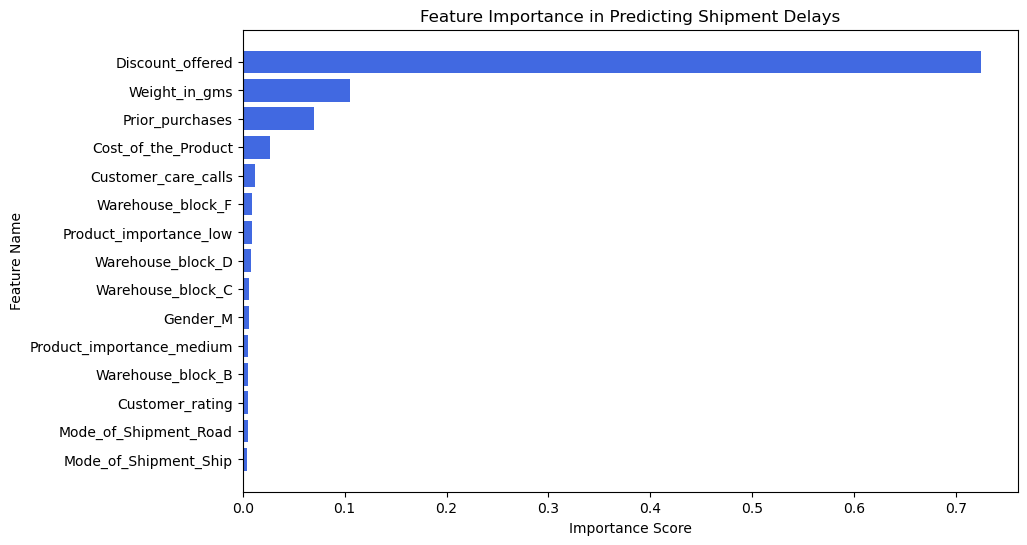

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get feature importance from the trained XGBoost model
feature_importance = best_xgb.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns  # Assuming feature names are stored here
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Predicting Shipment Delays")
plt.gca().invert_yaxis()  # Invert so the most important feature is at the top
plt.show()
